### IDs:
Insert yours IDs to the cell below

ID #1:311146021

ID #2:308252808

ID #3:301850517

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
import scipy
from scipy.stats import pearsonr, kendalltau, spearmanr, multivariate_normal as mn
import scipy.stats as stats
from scipy.stats import uniform, norm, expon, binom, skewnorm
from scipy.sparse import data
import statsmodels.stats.api as sms
from numpy.linalg import matrix_power
import math
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

Pearson2 is 0.9837656397050015
Pearson is -0.9947619015757405


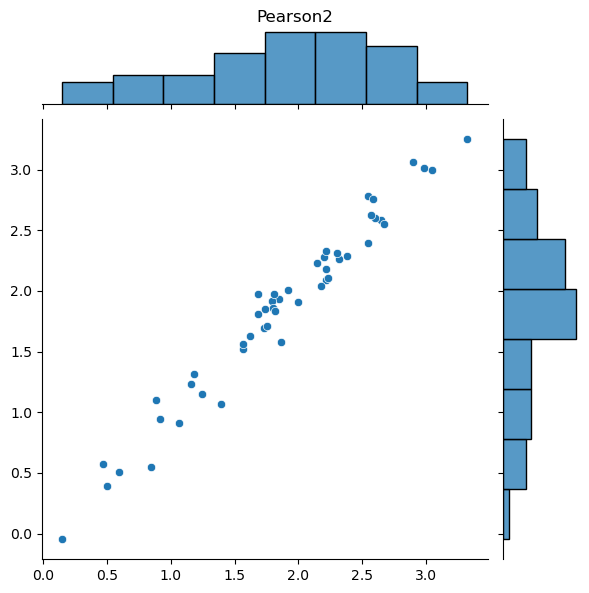

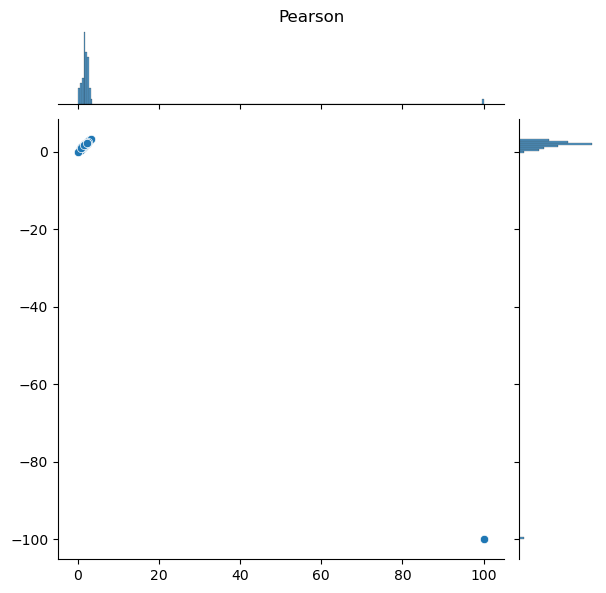

In [2]:
mu = [2,2]
sigma = [[0.8,0.79]
        ,[0.79,0.8]]
X = mn(mu,sigma,seed=1)
r= X.rvs(size = 49)
p2 = sns.jointplot(data=r, x=r[:,0], y=r[:,1])
p2.fig.suptitle("Pearson2")
p2.fig.subplots_adjust(top=0.95)
print(f'Pearson2 is {pearsonr(r[:,0],r[:,1])[0]}')
r2 = np.vstack((r,[100,-100]))
p = sns.jointplot(data=r2, x=r2[:,0], y=r2[:,1])
p.fig.suptitle("Pearson")
p.fig.subplots_adjust(top=0.95)
print(f'Pearson is {pearsonr(r2[:,0],r2[:,1])[0]}')

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

Not possible.


The Pearson correlation coefficient measures the linear correlation between two variables, and a value of -0.9 or lower indicates a strong negative linear correlation. If a strong negative linear correlation exists between two variables, it is not possible for a subset of the data to have a strong positive linear correlation and if 𝝆(x,y) = 1 that mean the data is monotonically increasing. thats way ∀i,j s.t i<j we have $x_i<x_j$ and $y_i<y_j$.
now, if we remove [$x_k,y_k$] we still have ∀i,j $\neq$ k s.t i<j we still have $x_i<x_j$ and $y_i<y_j$. hance the new data is still increasing and therefore 𝝆(x,y) = 1

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

Spearman: -0.500600
Kendall: -0.020408
Kendall = -0.020408 > Spearman + 0.45 = -0.050600


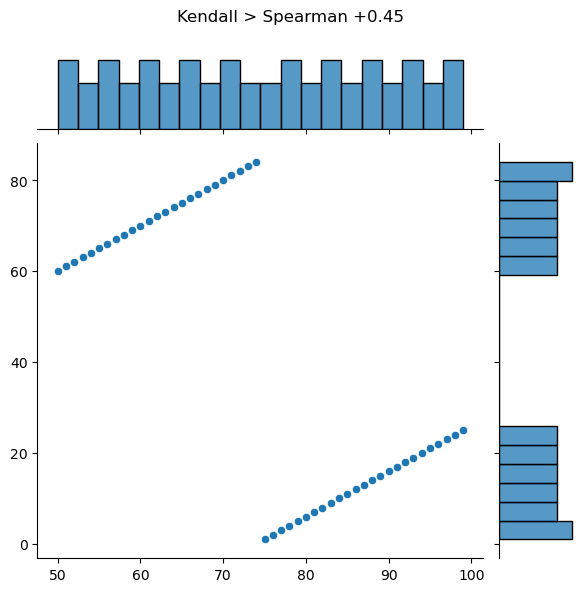

In [3]:
x = np.arange(50,100)
y= np.arange(60,85)
y = np.append(y, np.arange(1,26))
print(f'Spearman: {spearmanr(x,y)[0]:2f}')
print(f'Kendall: {kendalltau(x,y)[0]:2f}')
print(f'Kendall = {kendalltau(x,y)[0]:2f} > Spearman + 0.45 = {spearmanr(x,y)[0]+0.45:2f}')
p = sns.jointplot(x=x, y=y, marginal_kws=dict(bins=20, fill=True))
p.fig.suptitle("Kendall > Spearman +0.45");
p.fig.subplots_adjust(top=0.9)

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

Spearman: 0.500600
Kendall: 0.020408
Kendall = 0.020408 < Spearman - 0.45 = 0.050600


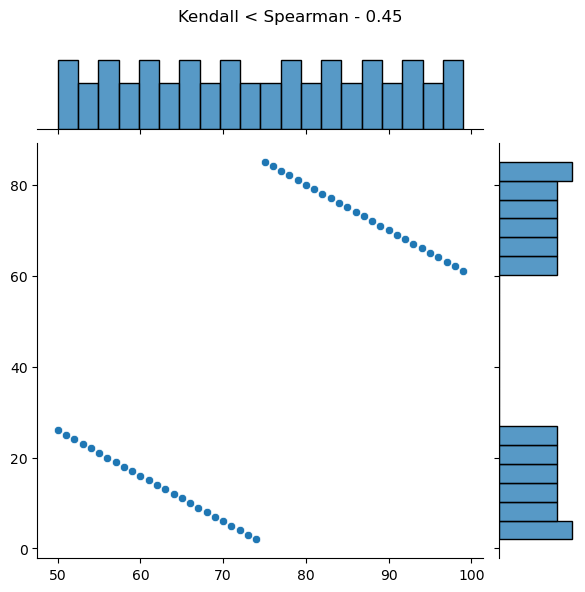

In [4]:
x = np.arange(50,100)
y= np.arange(26,1,-1)
y = np.append(y, np.arange(85,60,-1))
print(f'Spearman: {spearmanr(x,y)[0]:2f}')
print(f'Kendall: {kendalltau(x,y)[0]:2f}')
print(f'Kendall = {kendalltau(x,y)[0]:2f} < Spearman - 0.45 = {spearmanr(x,y)[0]-0.45:2f}')
p = sns.jointplot(x=x, y=y, marginal_kws=dict(bins=20, fill=True))
p.fig.suptitle("Kendall < Spearman - 0.45");
p.fig.subplots_adjust(top=0.9)

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

Pearson: 0.35
Spearman: 1.00
Spearman - 0.6: 0.40


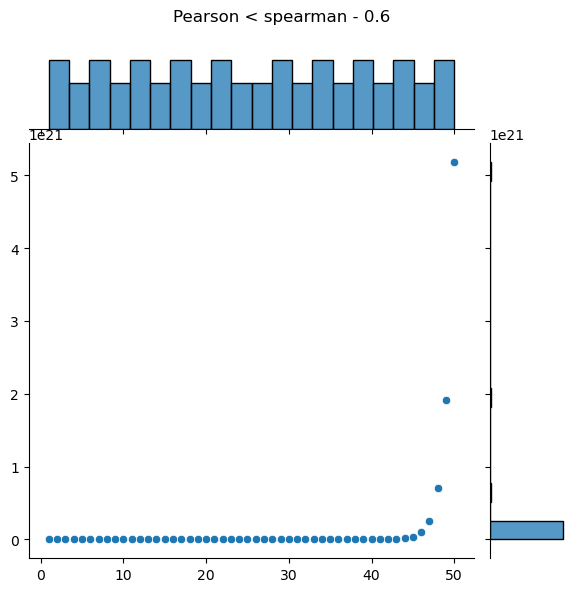

In [5]:
x = np.arange(1,51)
y = np.exp(x)
print(f'Pearson: {pearsonr(x,y)[0]:.2f}') 
print(f'Spearman: {spearmanr(x,y)[0]:.2f}')
print(f'Spearman - 0.6: {spearmanr(x,y)[0] - 0.6:.2f}')
p = sns.jointplot(x=x, y=y, marginal_kws=dict(bins=20, fill=True))
p.fig.suptitle("Pearson < spearman - 0.6")
p.fig.subplots_adjust(top=0.9)

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

Pearson: 0.60
Spearman: -0.88
Spearman + 1.2: 0.32


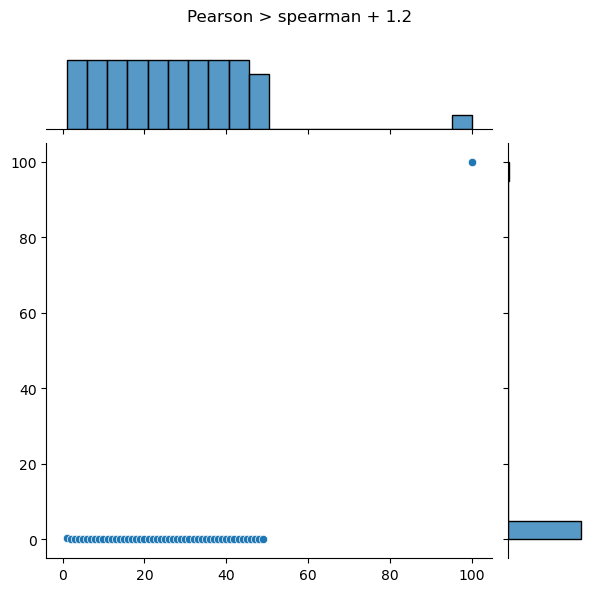

In [6]:
x = np.arange(1,50)
y= np.exp(-x)
x = np.append(x, 100)
y = np.append(y, 100)
print(f'Pearson: {pearsonr(x,y)[0]:.2f}') 
print(f'Spearman: {spearmanr(x,y)[0]:.2f}')
print(f'Spearman + 1.2: {spearmanr(x,y)[0] + 1.2:.2f}')
p = sns.jointplot(x=x, y=y, marginal_kws=dict(bins=20, fill=True))
p.fig.suptitle("Pearson > spearman + 1.2")
p.fig.subplots_adjust(top=0.9)

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

We think that this case is impossible since both Spearman and Kendall correlation are rank correlations, which means hat they are ranking the datapoints according to some properties. 
Spearman is dealing with degree of association between two variables, while
Kendall is dealing with the strength of dependence between two variables.
Though the ranking methos differ, the difference cannot differ in a great number (such as 1.2) as they are both relativly correlation ranking. Moreover, it has shown (in the code above and in scintific methods) that they are differ by no more than 50%.</i>

<i>To address it deeply, we found a great study showing the ratio between the 2 and detrmine that is stands for 3/2 (which of course support the answer that such 1.2 gap cannot be valid).</i>

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


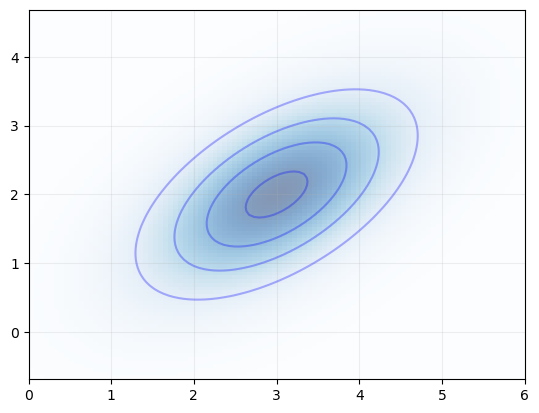

In [7]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    # ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]

plot_2d_Gaussian_pdf(means, cov)


In [8]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
5,NaN,1.0,0.0,140.0,192.0,0.0,1.0,NaN,0,0.4,1,0,1,1
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0,NaN,2,0,3,1
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0,1.6,2,0,2,1


In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        150
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      39
slope         3
ca            5
thal          4
target        2
dtype: int64

### Handling the missing values by featuers types

There are missing values in the data. We imputed them by using the median (for numerical features) and the mode (for categorical features) value of the relevant feature 

In [10]:
#Counting the missing values of the variables
df.isna().sum()

age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Data Correction:

In [11]:
# Imputing the missing values by fetures type

numeric_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
categorical_features = ['sex', 'cp', 'restecg', 'fbs', 'exang', 'slope', 'thal', 'ca']

for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_features:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,0.686469,0.953795,131.630363,245.848185,0.148515,0.524752,149.610561,0.326733,1.036634,1.399340,0.729373,2.313531,0.544554
std,8.964069,0.464696,1.031544,17.358758,51.604360,0.356198,0.519693,22.858624,0.469794,1.158160,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Numerical features with CI of 95%   

Using confidence intervals of 95% we can state what numirecal features that healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean, as we can see below: 

In [14]:
# split the df by target and setting the params
df_healthy = df.loc[df['target'] == 0]
df_disease = df.loc[df['target'] == 1]
alpha = 0.05

In [15]:
# Iterate the numeric features
for col in numeric_features:
    # column data
    c_h = df_healthy[col]
    c_d = df_disease[col]
    # calculate CI    
    s1, s2 = np.var(c_h, ddof=1), np.var(c_d, ddof=1)      
    n1 = len(c_h)
    n2 = len(c_d)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))    
    deg = n1 + n2 - 2                                           
    t = stats.t.ppf(1 - alpha/2, deg) 
    mean_diff = np.mean(c_h) - np.mean(c_d)
    n_p = 1 / len(c_h) + 1 / len(c_d)
    low = mean_diff - t * np.sqrt(n_p) * s
    high = mean_diff + t * np.sqrt(n_p) * s
    print(f"For {col} feature the healthy mean is: {np.mean(c_h):.3f}, the disease mean: {np.mean(c_d):.3f}")
    
    if low <= 0 <= high:
        print(f"The intervals is: ({low:.3f}, {high:.3f})")
        print(f"We cannot reject the null hypothesis using the CI of 95%")
    else:
        if np.mean(c_h) > np.mean(c_d):
            print(f"The intervals is: ({low:.3f}, {high:.3f})")
            print(f"In confidence of 95% the healthy population mean is larger than the disease population mean")
        else:
            print(f"The intervals is: ({low:.3f}, {high:.3f})")
            print(f"In confidence of 95% the healthy population mean is smaller than the disease population mean")
    print(        
    ) 

For age feature the healthy mean is: 56.667, the disease mean: 52.515
The intervals is: (2.168, 6.135)
In confidence of 95% the healthy population mean is larger than the disease population mean

For trestbps feature the healthy mean is: 134.399, the disease mean: 129.315
The intervals is: (1.179, 8.988)
In confidence of 95% the healthy population mean is larger than the disease population mean

For chol feature the healthy mean is: 250.572, the disease mean: 241.897
The intervals is: (-3.017, 20.368)
We cannot reject the null hypothesis using the CI of 95%

For thalach feature the healthy mean is: 139.072, the disease mean: 158.424
The intervals is: (-24.063, -14.640)
In confidence of 95% the healthy population mean is smaller than the disease population mean

For oldpeak feature the healthy mean is: 1.572, the disease mean: 0.589
The intervals is: (0.744, 1.221)
In confidence of 95% the healthy population mean is larger than the disease population mean



### Histograms of numerical features

By observing the plots of age, trestbps, chol and thalach, the histograms appears to be in the shape of a Normal distribution, therefore by using MLE we derive the disribution parameters in order to use the ampirical μ and σ to fit the Normal curve:

$$L(\Theta)=ln(p(D\mid\Theta)=ln(\varphi(x_{1},x_{2},...x_{n}\mid\Theta)=ln(\prod_{i}^{n}\varphi(x_{i}\mid\Theta)$$

$$=\sum_{i}^{n}ln(\varphi(x_{i}\mid\Theta))=\sum_{i}^{n}ln(\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x_{i}-\mu)^{2}}{2\sigma^{2}}})=$$

$$\sum_{i}^{n}-\frac{1}{2}ln(2\pi\sigma^{2})-\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}=$$

$$\frac{dL(\Theta)}{d\mu}=-\frac{1}{2\sigma^{2}}\sum_{i}^{n}-2(x_{i}-\mu)=0$$

$$\hat{\mu}=\frac{1}{n}\sum_{i}^{n}x_{i}$$

$$   $$

$$\sum_{i}^{n}-\frac{1}{2}ln(2\pi\sigma^{2})-\frac{-(x_{i}-\mu)^{2}}{2\sigma^{2}}=$$

$$\frac{n}{2}ln(2\pi\sigma^{2})-\frac{1}{2\sigma^{2}}\sum_{i}^{n}(x_{i}-\mu)^{2}$$

$$\frac{dL(\Theta)}{d\sigma}=-\frac{n}{\sigma}+\frac{1}{\sigma^{3}}\sum_{i}^{n}(x_{i}-\mu)^{2}=0$$

$$\sum_{i}^{n}(x_{i}-\mu)^{2}=n\sigma^{2}$$

$$\hat{\sigma=}\sqrt{\frac{1}{n}\sum_{i}^{n}(x_{i}-\mu)^{2}}$$

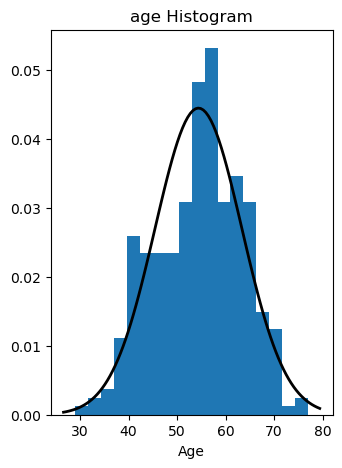

In [16]:
# histogram of age
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,2,1)
ax.hist(df["age"], density=True, bins=18)
ax.set(xlabel='Age', title="age Histogram");

# generate the plot by using the MLE method 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df["age"].mean(), df["age"].std())
plt.plot(x, p, 'k', linewidth=2);

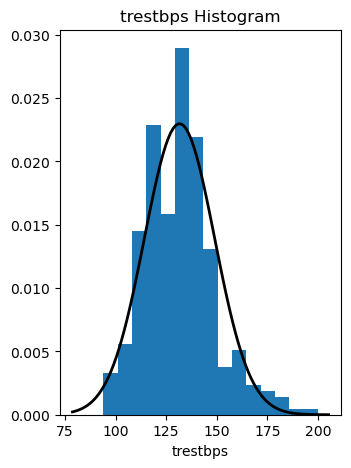

In [17]:
# histogram of trestbps
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,2,1)
ax.hist(df["trestbps"], density=True, bins=15)
ax.set(xlabel='trestbps', title="trestbps Histogram");

# generate the plot by using the MLE method 
xmin, xmax = plt.xlim()
x = np.linspace(xmin-10, xmax, 100)
p = norm.pdf(x, df["trestbps"].mean(), df["trestbps"].std())
plt.plot(x, p, 'k', linewidth=2);

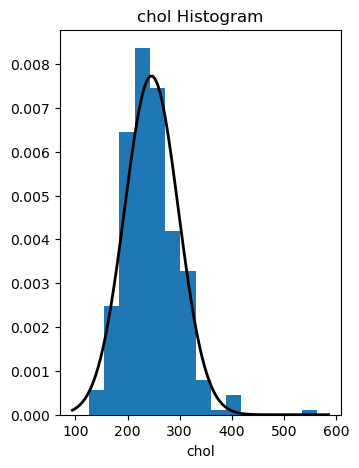

In [18]:
# histogram of chol
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,2,1)
ax.hist(df["chol"], density=True, bins=15)
ax.set(xlabel='chol', title="chol Histogram");

# generate the plot by using the MLE method 
xmin, xmax = plt.xlim()
x = np.linspace(xmin-10, xmax, 100)
p = norm.pdf(x, df["chol"].mean(), df["chol"].std())
plt.plot(x, p, 'k', linewidth=2);

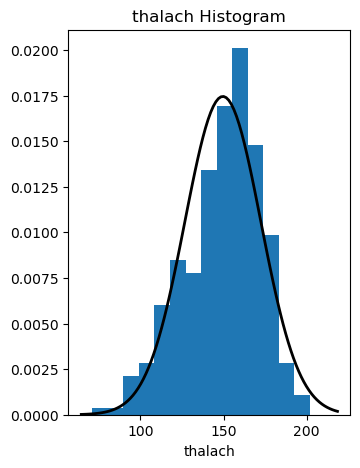

In [19]:
# histogram of thalach
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,2,1)
ax.hist(df["thalach"], density=True, bins=14)
ax.set(xlabel='thalach', title="thalach Histogram");

# generate the plot by using the MLE method 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax+10, 100)
p = norm.pdf(x, df["thalach"].mean(), df["thalach"].std())
plt.plot(x, p, 'k', linewidth=2);

By observing the plot of oldpeak, the histogram appears to be in the shape of a Exponential distribution, therefore by using MLE we derive the disribution λ parameter: 

$$L(\Theta)=ln(p(D\mid\Theta))=ln(f(x_{1},x_{2},...x_{n}\mid\Theta)=ln(\prod_{i}^{n}f(x_{i}\mid\Theta)=$$

$$\sum_{i}^{n}ln(f(x_{i}\mid\Theta))=\sum_{i}^{n}ln(\lambda e^{-\lambda x_{i}})=$$

$$nln\lambda-\lambda\sum_{i}^{n}x_{i}$$

$$\frac{dL(\Theta)}{d\lambda}=\frac{n}{\lambda}-\sum_{i}^{n}x_{i}=0$$

$$\hat{\lambda}=\frac{n}{\sum_{i}^{n}x_{i}}%=$$

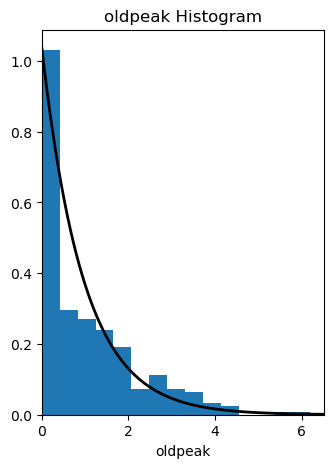

In [20]:
# histogram of oldpeak
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,2,1)
ax.hist(df["oldpeak"], density=True, bins=15)
ax.set(xlabel='oldpeak', title="oldpeak Histogram", xlim=0);

# generate the plot by using the MLE method 
xmin, xmax = plt.xlim()
x = np.linspace(0, xmax, 100)
p = expon.pdf(x, loc=0, scale=1/df["oldpeak"].mean())
plt.plot(x, p, 'k', linewidth=2);

But by observing this plot, the histogram appears to be in the shape of a lognormal distribution as well, therefore by using MLE we derive the following:

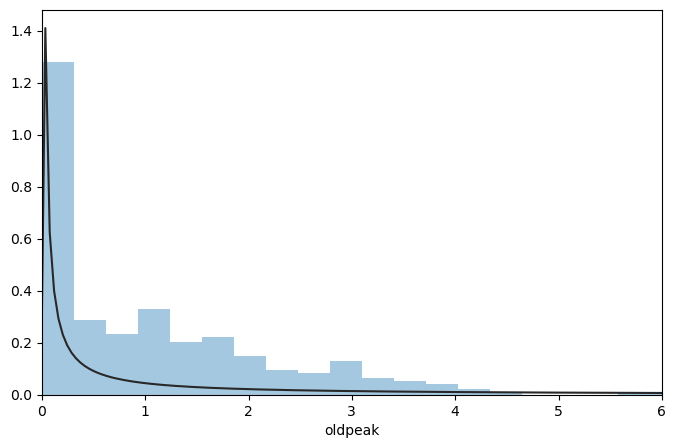

In [21]:
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(df["oldpeak"],hist=True, kde=False,norm_hist=False, bins=20, fit=stats.lognorm)
ax.set_xlim(0, 6);

### Correlations of numerical features

For each pair of numerical features, we calculated correlations and indicated whether we found them significant. \
For selected pairs, with significant correlations, we drew joint plot with marginal histograms (see Seaborn joint plot) and found the bivariate normal fits. \
In addition we drew plots of the bivariate pdfs

In [22]:
# correlation table
numerical_df = df[numeric_features]
numerical_df.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.256794,0.208909,-0.401671,0.218477
trestbps,0.256794,1.000000,0.115282,-0.040378,0.194220
chol,0.208909,0.115282,1.000000,-0.017785,0.060661
thalach,-0.401671,-0.040378,-0.017785,1.000000,-0.330060
oldpeak,0.218477,0.194220,0.060661,-0.330060,1.000000


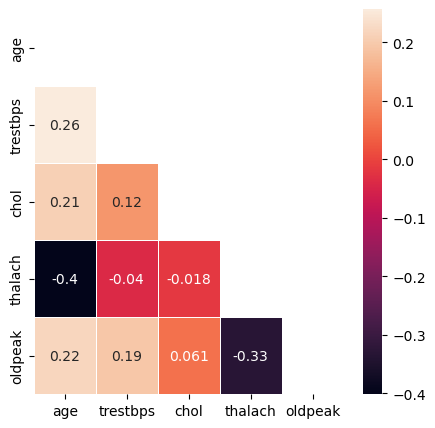

In [23]:
# numerical featuers was selected in order to plot their correlation 
mask = np.zeros_like(numerical_df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (5,5))
sns.heatmap(numerical_df.corr(), annot=True, mask = mask, linewidths=0.5);

#### The pairs that their abs corr >= to 0.3 are: 
age - thalach \
oldpeak - thalach \
We are calculaing the Pearson's correlation and the p-value 

In [24]:
# bivariate pdfs
def plot_2d_Gaussian_pdf(means, cov, title, x_l, y_l):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape), alpha=0.3, colors='b')
    ax.set(title=title, xlabel=x_l, ylabel=y_l)
    ax.grid(alpha=0.2)
    plt.show()

#### The age - thalach  pair

In [25]:
# pearson corr and p-value 
pcc , p_value = pearsonr(df['age'], df['thalach'])
print(f'The pearson correlation of age & thalach is: {pcc:.3f}, \
and this correlation is statically significant because the p-value of {p_value} is smaller than the significance level')

The pearson correlation of age & thalach is: -0.402, and this correlation is statically significant because the p-value of 3.556043738767052e-13 is smaller than the significance level


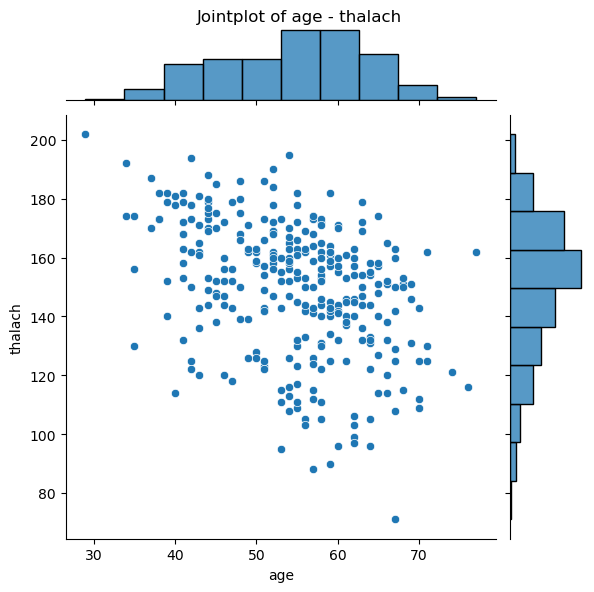

In [26]:
# Jointplot for age,thalach 
jp = sns.jointplot(x= "age", y ="thalach", data=df, marginal_kws=dict(bins=10))
jp.fig.suptitle("Jointplot of age - thalach")
jp.fig.subplots_adjust(top=0.95);

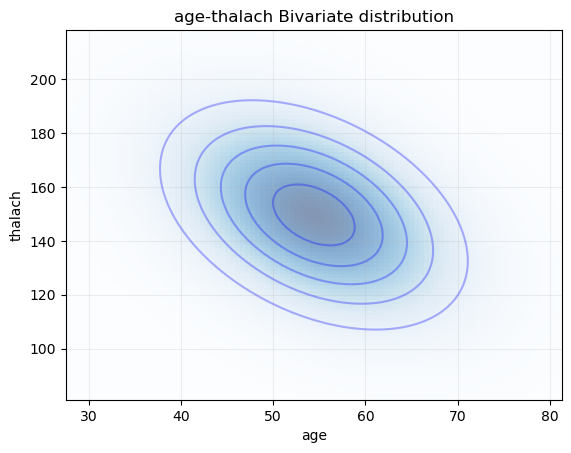

In [27]:
# Bivariate distribution
means = [df['age'].mean(), df['thalach'].mean()]
cov_pairs = df['age'].cov(df['thalach'])
cov = [[df['age'].var(), cov_pairs], [cov_pairs, df['thalach'].var()]]

plot_2d_Gaussian_pdf(means, cov, "age-thalach Bivariate distribution", 'age', 'thalach');

#### The oldpeak - thalach  pair

In [28]:
# pearson corr and p-value 
pcc , p_value = pearsonr(df['oldpeak'], df['thalach'])
print(f'The pearson correlation of oldpeak & thalach is: {pcc:.3f}, \
and this correlation is statically significant because the p-value of {p_value} is smaller than the significance level')

The pearson correlation of oldpeak & thalach is: -0.330, and this correlation is statically significant because the p-value of 3.923579112947149e-09 is smaller than the significance level


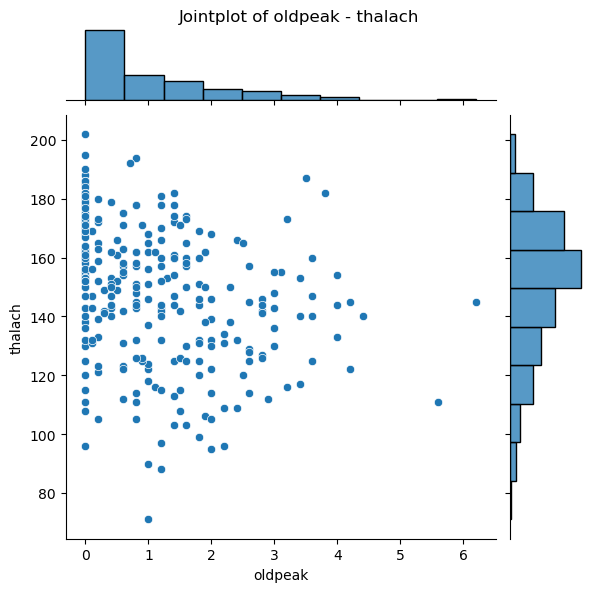

In [29]:
# Jointplot for oldpeak,thalach 
jp = sns.jointplot(x= "oldpeak", y ="thalach", data=df, marginal_kws=dict(bins=10))
jp.fig.suptitle("Jointplot of oldpeak - thalach")
jp.fig.subplots_adjust(top=0.95);

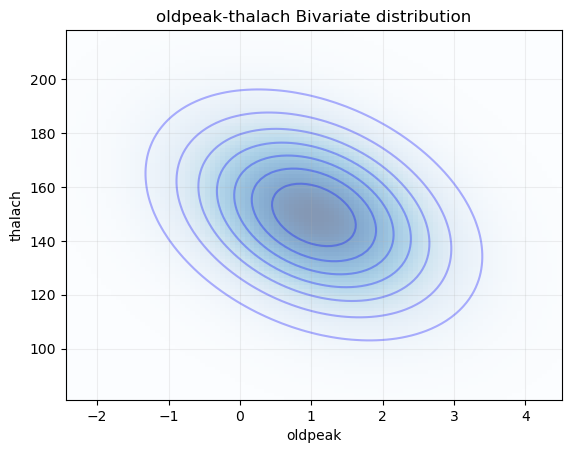

In [30]:
# Bivariate distribution
means = [df['oldpeak'].mean(), df['thalach'].mean()]
cov_pairs = df['oldpeak'].cov(df['thalach'])
cov = [[df['oldpeak'].var(), cov_pairs], [cov_pairs, df['thalach'].var()]]

plot_2d_Gaussian_pdf(means, cov, "oldpeak-thalach Bivariate distribution", 'oldpeak', 'thalach');

### We are presenting the pairs that are significantly correlated in males but not in females vs. the opposite

In [31]:
# split the df to female and male
df_female = df[df['sex']== 0] # for female
df_female = df_female[numeric_features]

df_male = df[df['sex']== 1] # for male
df_male = df_male[numeric_features]

In [32]:
# corr table for female
df_female.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.268502,0.240547,-0.399214,0.230982
trestbps,0.268502,1.000000,0.129123,-0.093803,0.389482
chol,0.240547,0.129123,1.000000,0.010119,0.114090
thalach,-0.399214,-0.093803,0.010119,1.000000,-0.247712
oldpeak,0.230982,0.389482,0.114090,-0.247712,1.000000


In [33]:
# corr table for male
df_male.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.244689,0.168917,-0.414002,0.227949
trestbps,0.244689,1.000000,0.088737,-0.022189,0.108667
chol,0.168917,0.088737,1.000000,-0.050555,0.061772
thalach,-0.414002,-0.022189,-0.050555,1.000000,-0.357558
oldpeak,0.227949,0.108667,0.061772,-0.357558,1.000000


In [34]:
# masks for corr 
mask_f = np.zeros_like(df_female.corr())
mask_f[np.triu_indices_from(mask_f)] = True

mask_m = np.zeros_like(df_male.corr())
mask_m[np.triu_indices_from(mask_m)] = True

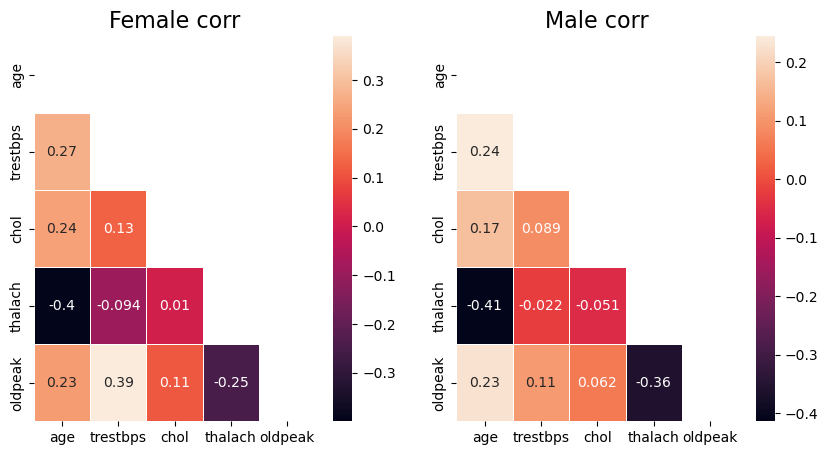

In [35]:
# corr heatmap plots
fig = plt.figure(figsize=(10,5))
# female heatmap
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Female corr',fontsize=16)
sns.heatmap(df_female.corr(), ax=ax1, annot=True, mask = mask_f, linewidths=.5);
# male heatmap
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Male corr',fontsize=16);
sns.heatmap(df_male.corr(), ax=ax2, annot=True, mask = mask_m, linewidths=.5);

In [36]:
def corr(df, col1,col2, sex):
    pcc , p_value = pearsonr(df[col1], df[col2])
    print(f'For {sex} the pearson correlation of {col1} & {col2} is: {pcc:.3f}, \
and this correlation is statically significant because the p-value of {p_value} is smaller than the significance level(5%)')
    print()
    return

In [37]:
corr(df_female, 'trestbps', 'oldpeak', 'female')
corr(df_female, 'age', 'thalach', 'female')
corr(df_male, 'thalach', 'oldpeak', 'male')
corr(df_male, 'age', 'thalach', 'male')

For female the pearson correlation of trestbps & oldpeak is: 0.389, and this correlation is statically significant because the p-value of 9.572956503027135e-05 is smaller than the significance level(5%)

For female the pearson correlation of age & thalach is: -0.399, and this correlation is statically significant because the p-value of 6.136561741420976e-05 is smaller than the significance level(5%)

For male the pearson correlation of thalach & oldpeak is: -0.358, and this correlation is statically significant because the p-value of 1.1452825202427482e-07 is smaller than the significance level(5%)

For male the pearson correlation of age & thalach is: -0.414, and this correlation is statically significant because the p-value of 5.100029237916627e-10 is smaller than the significance level(5%)



#### Significant correlation
The pairs features that their correlation is significant in female but not in male is trestbps - oldpeak:  0.389 (vs 0.109 in male)
The pairs features that their correlation is significant in male but not in female is thalach - oldpeak:  -0.36 (vs -0.248 in female)
The pairs fetures that their correlation is significant for both female and male is age - thalach: -0.399 in female, -0.414 in male

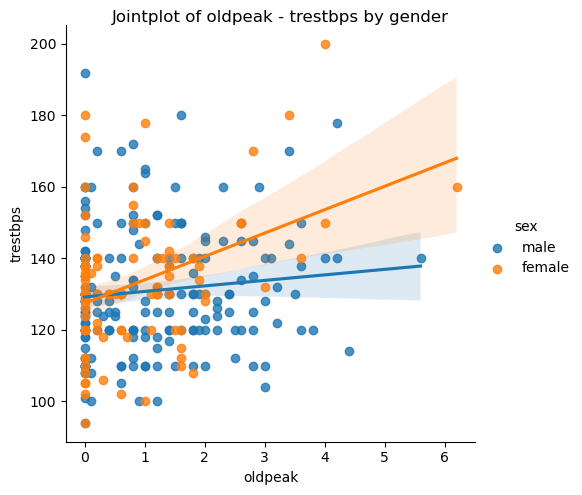

In [38]:
# Jointplot of oldpeak - trestbps  by gender
df['sex'].replace([0,1],['female','male'], inplace=True)
jp = sns.lmplot( data=df, x='oldpeak', y='trestbps', hue = 'sex')
jp.fig.suptitle("Jointplot of oldpeak - trestbps by gender")
jp.fig.subplots_adjust(top=0.95)

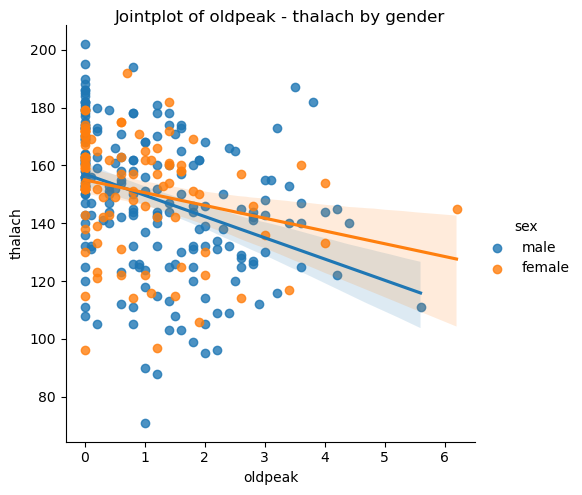

In [39]:
# Jointplot of oldpeak - thalach by gender
jp = sns.lmplot(data=df, x='oldpeak', y='thalach', hue = 'sex')
jp.fig.suptitle("Jointplot of oldpeak - thalach by gender")
jp.fig.subplots_adjust(top=0.95)

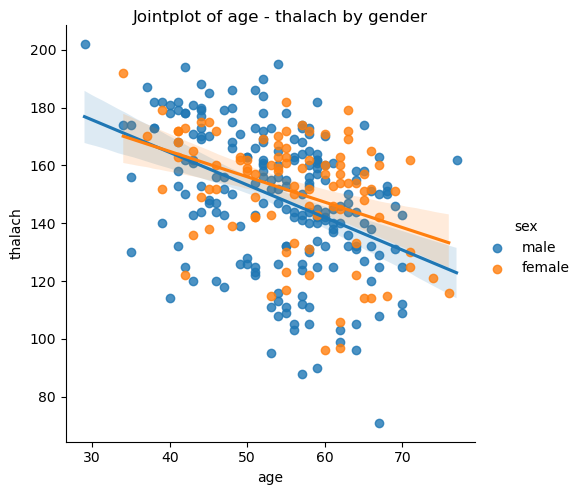

In [40]:
# Jointplot of age - thalach by gender
jp = sns.lmplot(data=df, x='age', y='thalach', hue = 'sex')
jp.fig.suptitle("Jointplot of age - thalach by gender")
jp.fig.subplots_adjust(top=0.95)

### We are presenting the pairs that are significantly correlated in healthy but not in disease vs. the opposite

In [41]:
# select the numirecal columns including the target column 
numer_w_t_df = df[['age','trestbps', 'chol', 'thalach', 'oldpeak','target']]
numer_w_t_df['target'].replace([0,1],['healthy','disease'],inplace=True)

In [42]:
# df_healthy the df to female and male
df_healthy = numer_w_t_df[numer_w_t_df['target']=='healthy'] # for healthy
df_healthy = df_healthy[numeric_features]
df_disease = numer_w_t_df[numer_w_t_df['target']=='disease'] # for disease
df_disease = df_disease[numeric_features]

In [43]:
# corr table for healthy
df_healthy.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.229051,0.131000,-0.134374,0.103145
trestbps,0.229051,1.000000,0.137042,0.008827,0.131073
chol,0.131000,0.137042,1.000000,0.023964,0.001750
thalach,-0.134374,0.008827,0.023964,1.000000,-0.188866
oldpeak,0.103145,0.131073,0.001750,-0.188866,1.000000


In [44]:
# corr table for disease
df_disease.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.240104,0.237966,-0.527542,0.194157
trestbps,0.240104,1.000000,0.076147,0.041142,0.180677
chol,0.237966,0.076147,1.000000,0.015728,0.064449
thalach,-0.527542,0.041142,0.015728,1.000000,-0.183805
oldpeak,0.194157,0.180677,0.064449,-0.183805,1.000000


In [45]:
# masks for corr 
mask_h = np.zeros_like(df_healthy.corr())
mask_h[np.triu_indices_from(mask_h)] = True

mask_d = np.zeros_like(df_disease.corr())
mask_d[np.triu_indices_from(mask_d)] = True

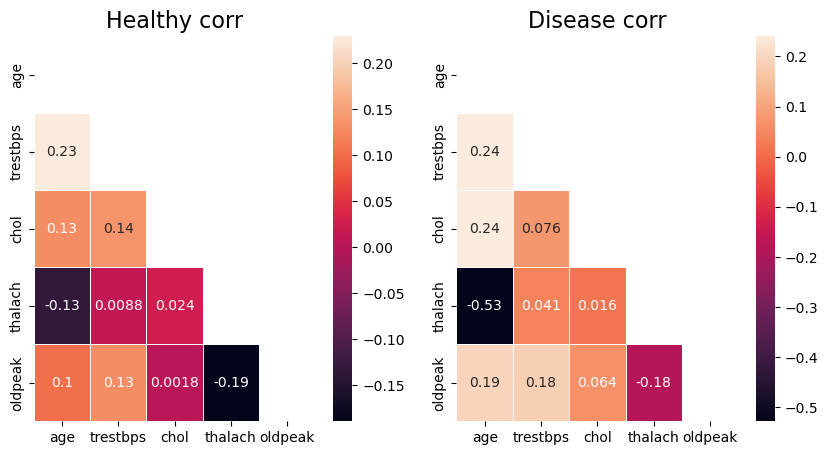

In [46]:
# corr heatmap plots
fig = plt.figure(figsize=(10,5))
# healthy heatmap
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Healthy corr',fontsize=16)
sns.heatmap(df_healthy.corr(), ax=ax1, annot=True, mask = mask_h, linewidths=.5);
# diseadse heatmap
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Disease corr',fontsize=16);
sns.heatmap(df_disease.corr(), ax=ax2, annot=True, mask = mask_d, linewidths=.5);

In [47]:
corr(df_disease, 'age', 'thalach', 'disease')

For disease the pearson correlation of age & thalach is: -0.528, and this correlation is statically significant because the p-value of 3.329564537668829e-13 is smaller than the significance level(5%)



#### significant correlation
The only one pair of features that their correlation is significant was in disease, the pair is age  -  thalach: -0.528 (vs. -0.134 in healthy)
The rest of the correlations in both healthy and disease are not abs corr >=  0.3

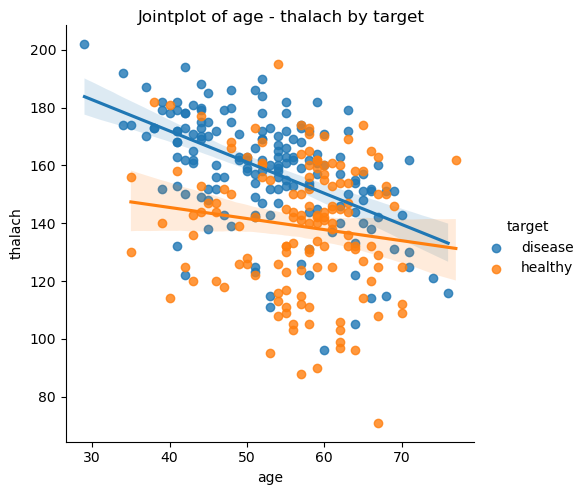

In [48]:
# Jointplot of oldpeak - trestbps  by gender
df['target'].replace([0,1],['healthy','disease'], inplace=True)
jp = sns.lmplot(data=df, x='age', y='thalach', hue = 'target')
jp.fig.suptitle("Jointplot of age - thalach by target")
jp.fig.subplots_adjust(top=0.95)

## Numerical feature distribution for this feature against bins of age

For each numerical feature, except age, we ploted the distribution for this feature against bins of age
In each bin we provided a split violin plot, with different colors for healthy and disease

In [49]:
min_age = df['age'].min()
min_age

29.0

In [50]:
max_age = df['age'].max()
max_age

77.0

In [51]:
# new ciloumn of age_group with bins and labels
bins= [0,40,50,60,70,80]
labels = ['0-40','40-50','50-60','60-70','70-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [52]:
fig = plt.figure(figsize=(15,15))
numer_features_w_a = numeric_features[1:]

<Figure size 1500x1500 with 0 Axes>

In [53]:
# function of violin plotting
def plot_violin(col):
    sns.violinplot(x="age_group", y=col, hue="target",
                    data=df, palette="muted", split=True)
    plt.title(f"age group by {col}")

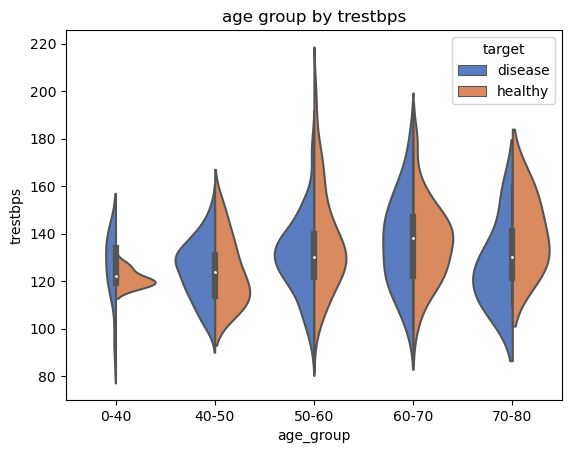

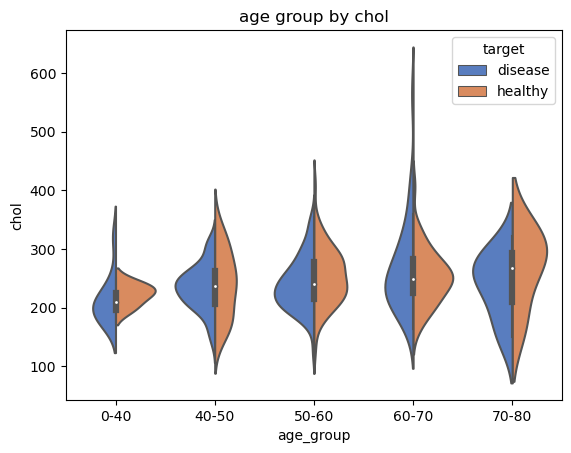

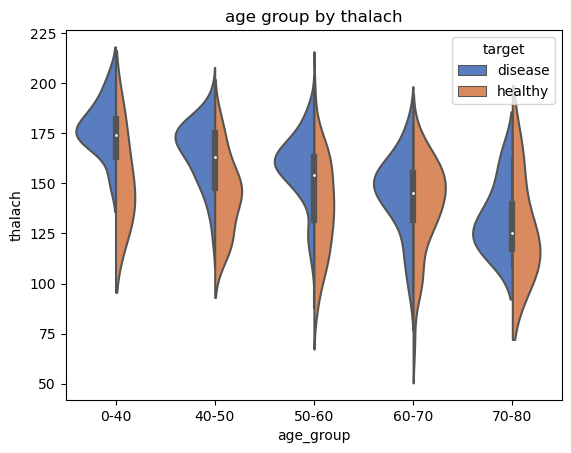

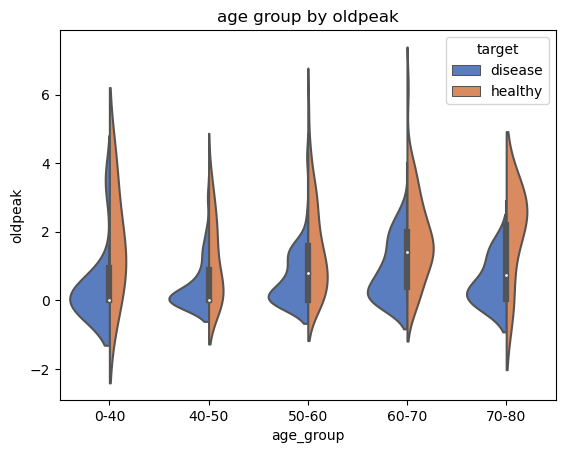

In [54]:
# iterate the violin plot for all the numerical fetures (except age)
for feature in numer_features_w_a:
    plot_violin(feature)
    plt.show()

## Heart diseases by age among male and female

#### In order to see the effect of the age among male and female on heart diseases, we generated the following figures

Below we can see the general diffrence between male and female by target groups, inside the female subjects of this sample we can see that there are more disease cases than the healthy one, but in the male subjects we can see the oposite \
In addition, there are more male subjects than female

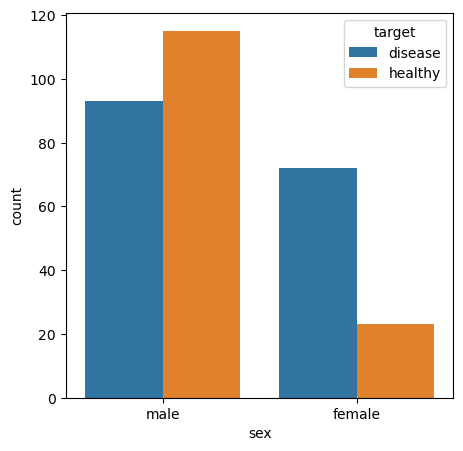

In [55]:
# target groups by female cs. male
plt.subplots(figsize=(5, 5))
sns.countplot(data=df, x="sex", hue="target")
plt.show()

In [56]:
plt.figure(figsize=(10,5))
bins = np.arange(min_age, max_age, 2)

<Figure size 1000x500 with 0 Axes>

In [57]:
healthy_ages = np.array(df_healthy['age'].values)
dieases_ages = np.array(df_disease['age'].values)

Below we can see that there are more disease cases in age less than 55, while ages greater than that - we can see the healthy cases are more common until ages greater than 71 \
Older 71 subjects seems to be including in disease group

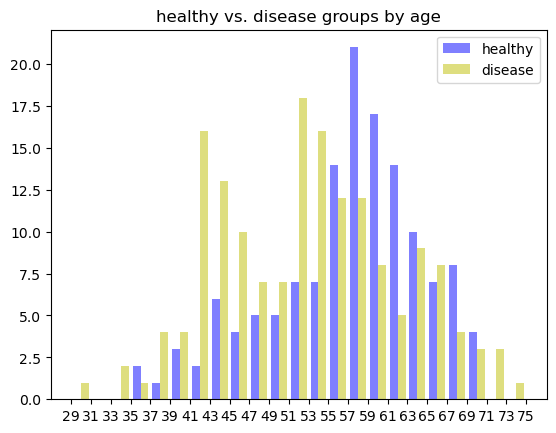

In [58]:
# healthy vs. disease groups by age
plt.hist([healthy_ages, dieases_ages], alpha=0.5, bins=bins, label=['healthy', 'disease'], color=['b', 'y'])
plt.xticks(bins)
plt.title('healthy vs. disease groups by age')
plt.legend(loc='upper right')
plt.show()

Below we can see that the female and male groups are similar by their median value in both healthy and disease (seems that in female is slightly greater), but the range (Q1-Q3) of disease in female is wider than in male (and the opposite in the healthy case)

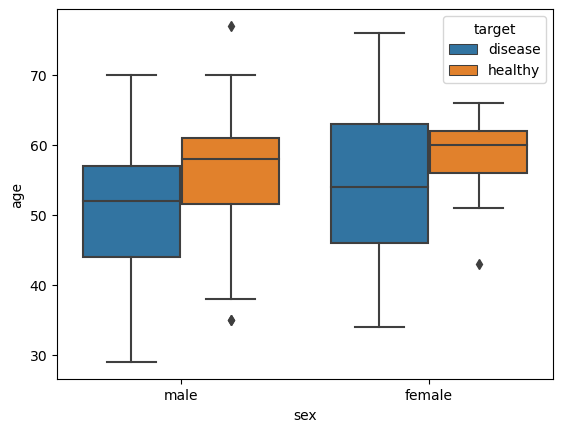

In [59]:
sns.boxplot(data=df, x='sex', y='age',hue="target");

In order to get more accurate results regarding this subject you can check the proportion test(because there are more male than female in this dataset that can direct to wrong conclusions)

## Heart diseases by age groups and cholestoral level

#### In order to see the effect of the cholestoral on heart diseases, we generated the following figures

Below we can see that the median of healthy group is greater than disease group, but there are more extreme high values in disease group

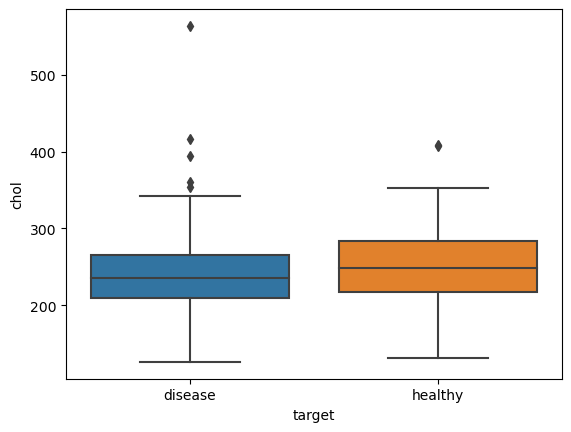

In [60]:
df_c_t = df[['chol','target']]
sns.boxplot(data=df_c_t, x='target', y='chol');

In order to understand the tendency to be included in disease group because the cholestoral level by the age group, we ploted this boxplot \
Here we can see that in overall the cholestoral level inceasing by age(As you get older, cholesterol levels rise)\
In range of 60-70 the max value of the cholestoral level is much higher in disease compare to healthy group(with extreme subject) and the range of the Q1-Q3 is wider in disease (while in age range of 40-50 is the opposite)

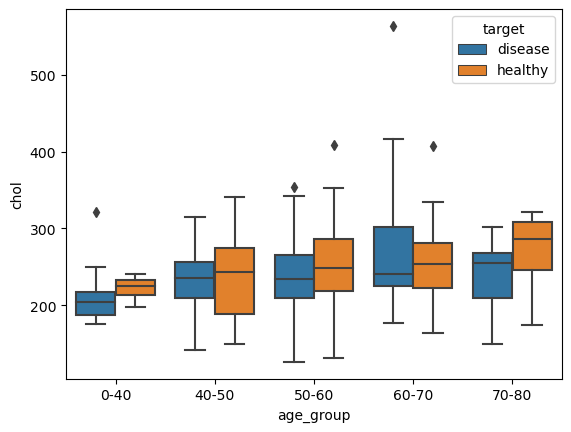

In [61]:
sns.boxplot(data=df, y='chol', x='age_group',hue="target");

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

(*) $1-\Phi(-x)=\Phi(x)$

(**) $\phi(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^{2}}{2}}$

$X\sim Lognormal(0,1)$, then $x=e^{2}$, where $Z$ is standard normal

Let $t>0$

$$
\underset{x\rightarrow\infty}{lim}e^{tx}P(X>x)	=	\underset{x\rightarrow\infty}{lim}e^{tx}(1-P(X\leq x))=\underset{x\rightarrow\infty}{lim}e^{tx}(1-P(X\leq x))=\underset{x\rightarrow\infty}{lim}e^{tx}(1-\Phi(\ln x)
	\overset{(*)}{=}	\underset{x\rightarrow\infty}{lim}e^{tx}\Phi(-\ln x)=\underset{x\rightarrow\infty}{lim}\frac{\Phi(-\ln x)}{e^{-tx}}=\underset{x\rightarrow\infty}{lim}\frac{\phi(-\ln x)}{-te^{-tx}}\cdot\left(-\frac{1}{x}\right)\overset{(**)}{=}\underset{x\rightarrow\infty}{lim}\frac{1}{\sqrt{2\pi}t}\cdot\frac{e^{-\frac{\ln^{2}x}{2}}}{xe^{-tx}}
	=	\underset{x\rightarrow\infty}{lim}\frac{1}{\sqrt{2\pi}t}\cdot\frac{e^{tx-\frac{\ln^{2}x}{2}}}{x}=\underset{x\rightarrow\infty}{lim}\frac{1}{\sqrt{2\pi}t}\cdot\frac{e^{tx-\frac{\ln^{2}x}{2}}\left(t-\frac{\ln x}{x}\right)}{1}=\underset{x\rightarrow\infty}{lim}\frac{1}{\sqrt{2\pi}t}\cdot e^{x\left(t-\frac{\ln^{2}x}{2x}\right)}\left(t-\frac{\ln x}{x}\right)
	\overset{\frac{\ln x}{x}\underset{x\rightarrow\infty}{\rightarrow}0}{=}	\frac{1}{\sqrt{2\pi}t}e^{\infty\cdot(t-0)}(t-0)=\infty,\forall t>0
$$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$$P(X_{1}<X_{2})=P(X_{2}-X_{1}>0)=1-P(X_{2}-X_{1}\leq0)=$$

$$1-\int_{0}^{\infty}f_{1}(x)\left(\int_{0}^{x}f_{2}(y)dy)\right)dx=$$

$$1-\int_{0}^{\infty}\lambda_{1}e^{-\lambda_{1}x}\left(\int_{0}^{x}\lambda_{2}e^{-\lambda_{2}y}dy\right)dx=$$

$$1-\int_{0}^{\infty}\lambda_{1}e^{-\lambda_{1}x}\left(1-e^{-\lambda_{2}x}\right)dx=1-\int_{0}^{\infty}\lambda_{1}e^{-\lambda_{1}x}-\lambda_{1}e^{-x(\lambda_{1}+\lambda_{2})}dx=$$

$$1-\left(\frac{-1}{\lambda_{1}}\lambda_{1}e^{-\lambda_{1}x}\mid_{0}^{\infty}+\frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}}e^{-x(\lambda_{1}+\lambda_{2})}\mid_{0}^{\infty}\right)=$$

$$1-\left(1-\frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}}\right)\Rightarrow$$

$$P(X_{1}<X_{2})=\frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}}$$

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

The mean of the uniformic distribution is: $E(x) = \frac{n+1}{2}$ 
hence we expect the average value of all 500 numbers in a trajectory to be somewhere around  3.5. \
$E(X) = \frac{6+1}{2} = 3.5$ , with given n = 6. <br/>

The distribution looks like a Normal distribution (bell), with the empirical mean of 3.495
and the empirical standard deviation of 0.469


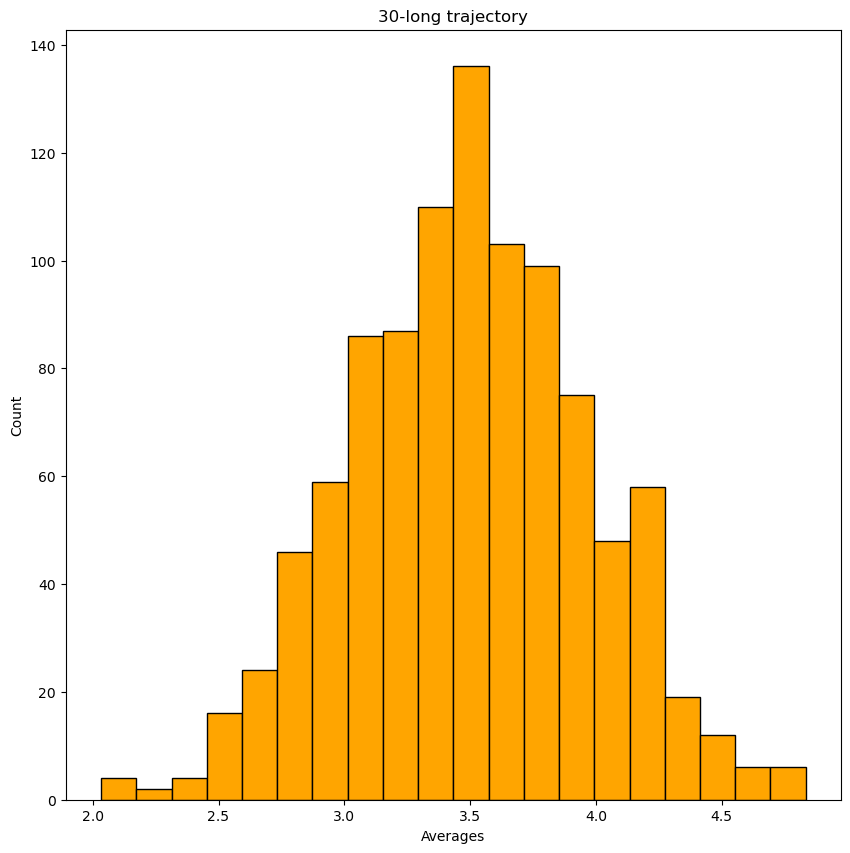

In [62]:
T = [[0.4, 0.2, 0.1, 0, 0.1, 0.2],
     [0.2, 0.4, 0.2, 0.1, 0, 0.1],
     [0.1, 0.2, 0.4, 0.2, 0.1, 0],
     [0, 0.1, 0.2, 0.4, 0.2, 0.1],
     [0.1, 0, 0.1, 0.2, 0.4, 0.2],
     [0.2, 0.1, 0, 0.1, 0.2, 0.4]]

trajectory_averages = []
for i in range(1000):  
    trajectory = []
    new_draw = np.random.choice(6 ,1 , p=np.ones(6)/6)[0]
    trajectory.append(new_draw+1)
    for i in range(29):
        new_draw = np.random.choice(6 ,1 , p=T[new_draw])[0]
        trajectory.append(new_draw+1) 
    trajectory_averages.append(np.mean(trajectory))
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1)
ax.set(xlabel="Averages", ylabel="Count", title="30-long trajectory")
ax.hist(trajectory_averages, bins=20, color = 'Orange', edgecolor='Black')


empirical_mean = round(np.mean(trajectory_averages),3)
empirical_std = round(np.std(trajectory_averages),3)

print(f'The distribution looks like a Normal distribution (bell), with the empirical mean of {empirical_mean}\nand the empirical standard deviation of {empirical_std}')

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

The distribution looks like a Normal distribution (bell), with the empirical mean of 3.499
and the empirical standard deviation of 0.12


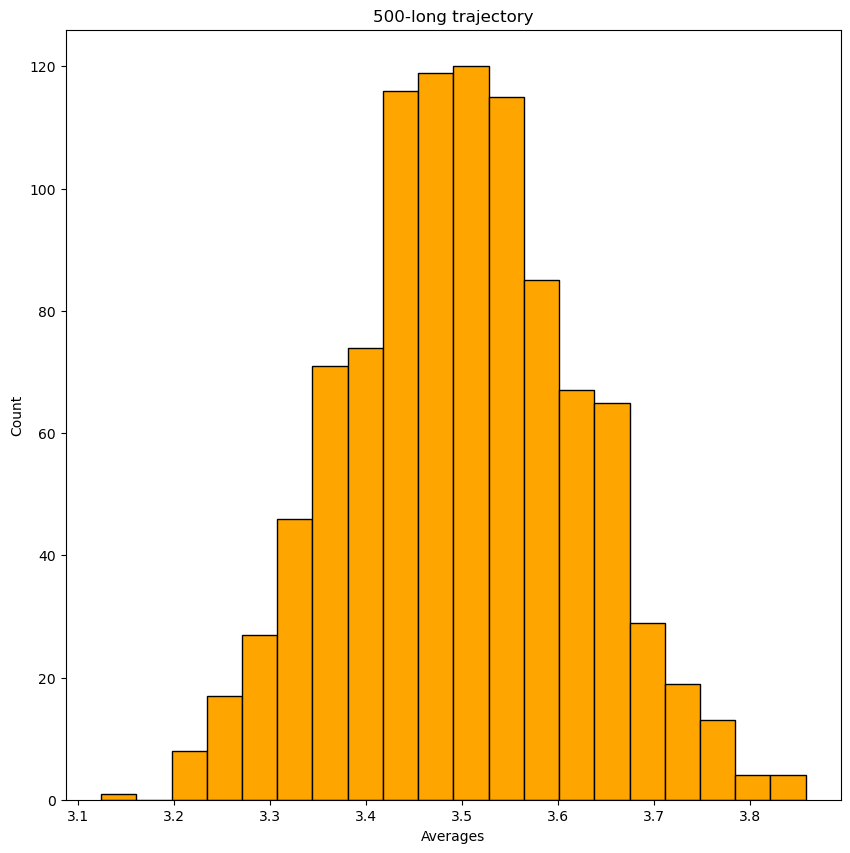

In [63]:
trajectory500_averages = []
for _ in range(1000):  
    trajectory = []
    new_draw = np.random.choice(6 ,1 , p=np.ones(6)/6)[0]
    trajectory.append(new_draw+1)
    for _ in range(499):
        new_draw = np.random.choice(6 ,1 , p=T[new_draw])[0]
        trajectory.append(new_draw+1) 
    trajectory500_averages.append(np.mean(trajectory))
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1)
ax.set(xlabel="Averages", ylabel="Count", title="500-long trajectory")
ax.hist(trajectory500_averages, bins=20, color = 'Orange', edgecolor='Black')

empirical_mean = round(np.mean(trajectory500_averages),3)
empirical_std = round(np.std(trajectory500_averages),3)

print(f'The distribution looks like a Normal distribution (bell), with the empirical mean of {empirical_mean}\nand the empirical standard deviation of {empirical_std}')

#### 4.C
Draw normal fit curves on your two histograms.

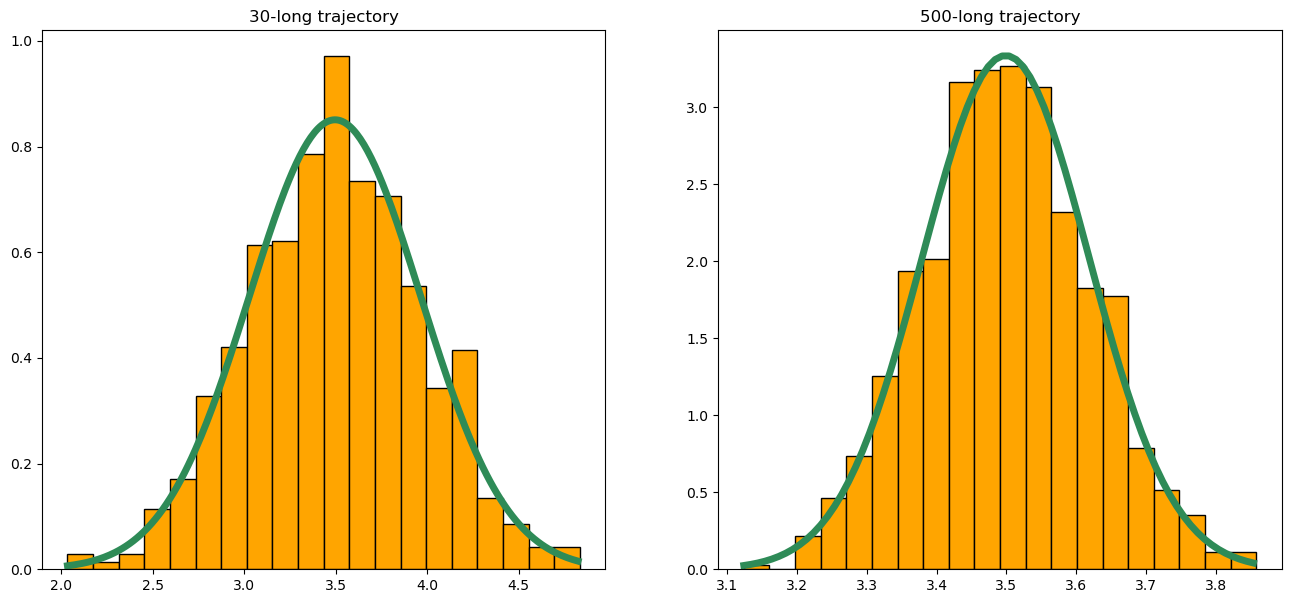

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.0, 7.0))

grid_30 = np.arange(np.min(trajectory_averages), np.max(trajectory_averages), 0.01)
ax1.hist(trajectory_averages, bins=20, density=True,  color = 'Orange', edgecolor='Black'), ax1.set_title('30-long trajectory')
ax1.plot(grid_30, norm.pdf(grid_30, loc=np.mean(trajectory_averages), scale=np.std(trajectory_averages)), color = 'Seagreen', linewidth = '5.0')

grid_500 = np.arange(np.min(trajectory500_averages), np.max(trajectory500_averages), 0.01)
ax2.hist(trajectory500_averages, bins=20, density=True,  color = 'Orange', edgecolor='Black'), ax2.set_title('500-long trajectory')
ax2.plot(grid_500, norm.pdf(grid_500, loc=np.mean(trajectory500_averages), scale=np.std(trajectory500_averages)), color = 'Seagreen', linewidth = '5.0')

plt.show()

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [65]:
def cov(index, pi_0, states, T):
    X_mean = 0
    Y_mean = 0
    XY_mean = 0
    
    # Each original matrix T in the power of each index 
    T_i = matrix_power(T, index)

    pi_i = pi_0 
    
    # E(X0)
    X_mean  = P0 @ states.T

    # E(Xi)
    Y_mean += pi_i @ states.T

    # E(X_0 * Xi)
    for x in states:
        for y in states:
            XY_mean += x * y * T_i[x - 1, y - 1] * pi_0[x-1]

    return XY_mean - X_mean * Y_mean

states = np.arange(1,7)
P0 = np.ones(6)/6
covariances = np.zeros(500)
for i in range(0,500):
  covariances[i]=cov(i+1, P0, states, T )
print(covariances)

[1.11666667e+00 5.16666667e-01 2.52666667e-01 1.25466667e-01
 6.25866667e-02 3.12666667e-02 1.56282667e-02 7.81314667e-03
 3.90637867e-03 1.95315067e-03 9.76567627e-04 4.88282275e-04
 2.44140830e-04 1.22070353e-04 6.10351645e-05 3.05175798e-05
 1.52587894e-05 7.62939462e-06 3.81469730e-06 1.90734867e-06
 9.53674345e-07 4.76837192e-07 2.38418613e-07 1.19209327e-07
 5.96046821e-08 2.98023632e-08 1.49012038e-08 7.45062323e-09
 3.72533471e-09 1.86269133e-09 9.31368760e-10 4.65711025e-10
 2.32876829e-10 1.16466836e-10 5.82556225e-11 2.91571212e-11
 1.46052059e-11 7.33457739e-12 3.69837494e-12 1.88116189e-12
 9.69890834e-13 5.18696197e-13 2.93098879e-13 1.81188398e-13
 1.26121336e-13 9.76996262e-14 8.52651283e-14 7.99360578e-14
 7.63833441e-14 7.81597009e-14 7.81597009e-14 8.17124146e-14
 8.17124146e-14 8.34887715e-14 8.34887715e-14 8.70414851e-14
 8.70414851e-14 8.88178420e-14 8.88178420e-14 9.05941988e-14
 9.05941988e-14 9.23705556e-14 9.41469125e-14 9.59232693e-14
 9.59232693e-14 9.947598

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

**Answer**

1. We know that $P(X\le q)=0.8$ and $n \ge 100$.<br>
This means that $P(X\ge q)=0.2$ <br>
Therefore:<br>
$P(R = 0) = P(a_1 > q) = 0.2$

2. Since the observations $\vec{x}(n)$ are independently sampled from $𝑋$ , we can say that the distribution of $𝑅$ is given by the binomial distribution with parameters $𝑛$ and the success is given with $P(X\le q)=0.8$

3. To compute an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$ , we can use the cumulative distribution function (CDF) of the binomial distribution with parameters $𝑛$ and $P(X\le q)=0.8$ :

In [66]:
def lambda_n(n):
    r=0
    while True:
        if (1 - binom.cdf(r, n, 0.8) >= 0.9) and (1 - binom.cdf(r+1, n, 0.8) < 0.9):
            return r
        r+=1
        if r>n:
            return None

4.

In [67]:
lambda_n = lambda_n(100)
count = 0

for i in range(200):
    sample = np.random.uniform(0, 1, 100)
    sample.sort()
    if sample[lambda_n] <= 0.8:
        count += 1
print(count)

182
